In [1]:
import pyarrow.parquet as pq
from glob import glob
import os
country_code = 'US'
path_to_data = '/scratch/spf248/twitter/data'
tweets=pq.ParquetDataset(glob(os.path.join(path_to_data,
                                           'classification',
                                           country_code,'labeling',
                                           '*.parquet'))).read().to_pandas()
import pandas as pd
labels = pd.read_csv('/scratch/spf248/twitter/data/classification/US/labeled/labels.csv')

In [2]:
print(tweets.dtypes)
tweets['tweet_id'] = pd.to_numeric(tweets['tweet_id'], downcast='integer')
tweets

tweet_id    object
text        object
keyword     object
target      object
dtype: object


,tweet_id,text,keyword,target
0,730444383636459522,"I just got laid off, I think I cried a little ...",laid_off,target_i_lost_my_job_today
1,387294960120107009,Laid off and had to sell my 2 tickets to @Pink...,laid_off,target_i_lost_my_job_today
2,282411950724505600,"I wasn't fired from my job, I was laid off. Yo...",laid_off,target_i_lost_my_job_today
3,704676467393736705,I feel like I lost my job. I didn’t get laid o...,laid_off,target_i_lost_my_job_today
4,748041925702332417,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,laid_off,target_i_lost_my_job_today
...,...,...,...,...
9795,418875619661725696,Anyone know of places hiring serving/hosting p...,position,target_anyone_hiring
9796,291207775500001280,Hello! I am currently seeking an Executive Ass...,position,target_anyone_hiring
9797,595590216255086592,Looking for work? Job fair seeks to fill 101 p...,position,target_anyone_hiring
9798,613832234143866880,is anyone interested in working for Honda ? hm...,position,target_anyone_hiring


In [3]:
labels

,tweet_id,1,2,3,4,5
0,278519817328279552,yes,no,yes,no,no
1,278534362910322688,no,no,yes,no,no
2,278660548453888001,yes,no,no,no,no
3,278721173192314880,no,no,no,unsure,no
4,278908360852639744,no,no,no,no,no
...,...,...,...,...,...,...
5541,1077327152817684480,no,no,no,no,yes
5542,1077682947258384384,no,no,no,no,yes
5543,1079020674377629701,no,no,no,no,yes
5544,1079086885648031745,no,no,no,no,yes


In [17]:
# classes = {'1': 'Does this tweet indicate that the user is currently unemployed?',
#  '2': 'Does this tweet indicate that the user became unemployed within the last month?',
#  '3': 'Does this tweet indicate that the user is currently searching for a job?',
#  '4': 'Does this tweet indicate that the user was hired within the last month?',
#  '5': 'Does this tweet contain a job offer?'}

In [4]:
# training_data = tweets.join(labels, lsuffix='tweet_id', rsuffix='tweet_id')
training_data = pd.merge(tweets, labels, how='inner', on='tweet_id')
training_data = training_data[['text', '1', '2', '3', '4', '5']]
print(training_data.dtypes)
# training_data[['1', '2', '3', '4', '5']] = training_data[['1', '2', '3', '4', '5']].replace('unsure', 'no')
print(pd.unique(training_data['2']))
training_data

text    object
1       object
2       object
3       object
4       object
5       object
dtype: object
['yes' 'no' 'unsure']


,text,1,2,3,4,5
0,"I just got laid off, I think I cried a little ...",yes,yes,no,no,no
1,Laid off and had to sell my 2 tickets to @Pink...,yes,no,no,no,no
2,"I wasn't fired from my job, I was laid off. Yo...",yes,no,no,no,no
3,I feel like I lost my job. I didn’t get laid o...,no,no,no,no,no
4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,no,yes,no,yes,no
...,...,...,...,...,...,...
5541,Got hired today!!!,no,no,no,yes,no
5542,Looking to get hired? Avoid these pitfalls htt...,no,no,no,no,no
5543,WOOOO one step closer to not being unemployed!...,yes,no,no,yes,no
5544,Anyone looking for a part time position in the...,no,no,no,no,yes


In [5]:
training_data[['1', '2', '3', '4', '5']] = training_data[['1', '2', '3', '4', '5']].replace('yes', 1)
training_data[['1', '2', '3', '4', '5']] = training_data[['1', '2', '3', '4', '5']].replace('no', 0)

In [6]:
training_data.columns = ['text', "is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]
# label_cols = ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]

In [7]:
training_data['text'] = training_data['text'].str.replace(',', '')
training_data['text'] = training_data['text'].str.replace("'","")
training_data['text'] = training_data['text'].str.replace('"','')
training_data['text'] = training_data['text'].str.replace('\n','',regex=True)
training_data['text'] = training_data['text'].str.replace('\r','',regex=True) # very important! apparently another way to create newlines that confuses the csv reader later!

import pickle
pickle.dump( training_data, open( "./training_data_march6.pkl", "wb" ) )


training_data

,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,I just got laid off I think I cried a little i...,1,1,0,0,0
1,Laid off and had to sell my 2 tickets to @Pink...,1,0,0,0,0
2,I wasnt fired from my job I was laid off. You ...,1,0,0,0,0
3,I feel like I lost my job. I didn’t get laid o...,0,0,0,0,0
4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,0,1,0,1,0
...,...,...,...,...,...,...
5541,Got hired today!!!,0,0,0,1,0
5542,Looking to get hired? Avoid these pitfalls htt...,0,0,0,0,0
5543,WOOOO one step closer to not being unemployed!...,1,0,0,1,0
5544,Anyone looking for a part time position in the...,0,0,0,0,1


In [8]:
# training_data['id'] = training_data.index
training_data.index.name='id'
# training_data = training_data.reset_index(drop=True)
training_data.reset_index(inplace=True)
training_data

,id,text,is_unemployed,lost_job_1mo,job_search,is_hired_1mo,job_offer
0,0,I just got laid off I think I cried a little i...,1,1,0,0,0
1,1,Laid off and had to sell my 2 tickets to @Pink...,1,0,0,0,0
2,2,I wasnt fired from my job I was laid off. You ...,1,0,0,0,0
3,3,I feel like I lost my job. I didn’t get laid o...,0,0,0,0,0
4,4,GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...,0,1,0,1,0
...,...,...,...,...,...,...,...
5541,5541,Got hired today!!!,0,0,0,1,0
5542,5542,Looking to get hired? Avoid these pitfalls htt...,0,0,0,0,0
5543,5543,WOOOO one step closer to not being unemployed!...,1,0,0,1,0
5544,5544,Anyone looking for a part time position in the...,0,0,0,0,1


is_unemployed [1 0]
lost_job_1mo [1 0]
job_search [0 1]
is_hired_1mo [0 1]
job_offer [0 1]


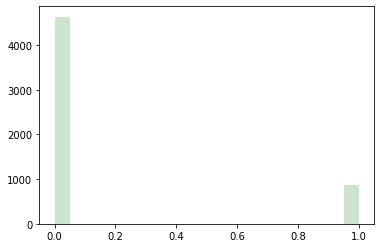

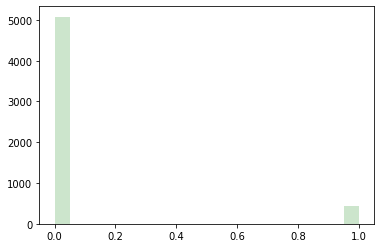

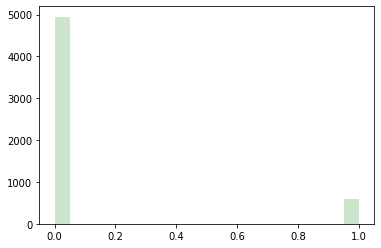

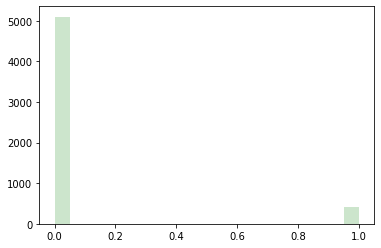

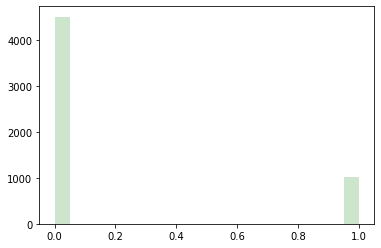

In [10]:
# unbalanced histogram data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:
#     training_data_temp = training_data
#     print(column)
    training_data_temp = training_data[training_data[column] != 'unsure']
    print(column, pd.unique(training_data_temp[column]))
    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(training_data_temp[column], bins=20, density = False, color = 'green', alpha = 0.2)
#     plt.hist(merged['pos_model'], bins=20, density = True, color = 'red', alpha = 0.2)
# #     plt.hist(merged['neg'], bins=20, density = True, color = 'green', alpha = 0.2)
#     plt.hist(merged['neg_model'], bins=20, density = True, color = 'blue', alpha = 0.2)
#     ax.set_yscale('log')

#     # plt..yscale(value)
#     plt.title(column)
    

is_unemployed num_pos 874 num_neg 4635 neg_data_sample (874, 3) (1748, 4)

train pos (697,) 
train neg (701,) 
val pos (176,) 
val neg (173,)
lost_job_1mo num_pos 441 num_neg 5078 neg_data_sample (441, 3) (882, 4)

train pos (356,) 
train neg (349,) 
val pos (84,) 
val neg (92,)
job_search num_pos 590 num_neg 4949 neg_data_sample (590, 3) (1180, 4)

train pos (473,) 
train neg (471,) 
val pos (117,) 
val neg (119,)
is_hired_1mo num_pos 425 num_neg 5099 neg_data_sample (425, 3) (850, 4)

train pos (343,) 
train neg (337,) 
val pos (82,) 
val neg (88,)
job_offer num_pos 1012 num_neg 4516 neg_data_sample (1012, 3) (2024, 4)

train pos (808,) 
train neg (811,) 
val pos (204,) 
val neg (200,)


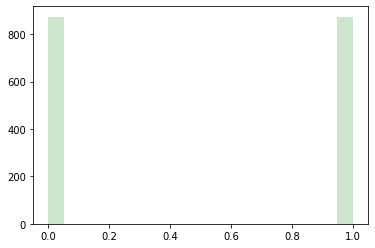

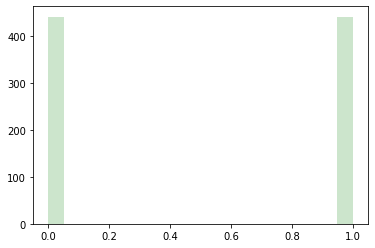

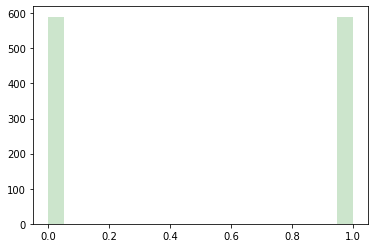

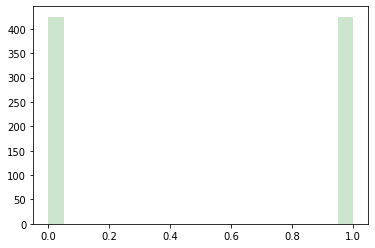

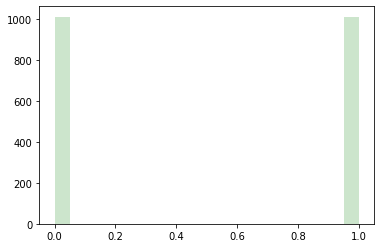

In [67]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:
#     training_data_temp = training_data
#     print('\n', column)
    training_data_temp_balanced = training_data[training_data[column] != 'unsure']
    
    training_data_temp_balanced = training_data_temp_balanced[['id', 'text', column]]

#     print(training_data_temp_balanced.head())
            
    num_pos = training_data_temp_balanced[training_data_temp_balanced[column] == 1].shape[0]
    num_neg = training_data_temp_balanced[training_data_temp_balanced[column] == 0].shape[0]
    
    pos_data = training_data_temp_balanced[training_data_temp_balanced[column] == 1]
    neg_data = training_data_temp_balanced[training_data_temp_balanced[column] == 0]
#     print(neg_data.shape)

    neg_data_sample = neg_data.sample(n=num_pos, random_state=1, replace = False)
#     print('neg_data_sample', neg_data_sample.shape)

    data = pd.concat([pos_data, neg_data_sample])
    
#     data.loc[data[column] == 1, 'pos'] = 1
#     data.loc[data[column] != 1, 'neg'] = 1    
#     print(data.columns)
    data.columns = ['id', 'text', 'pos']
    data['neg'] = 1 - data['pos']
    
#     data.loc[data['pos'] == data['neg'], 'test'] = 1
#     print('malformed data?', pd.unique(data['test']))    
#     print(data.head())
#     print(neg_data_sample)
#     print(data)

    
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.hist(data['pos'], bins=20, density = False, color = 'green', alpha = 0.2)

    print(column, 'num_pos', num_pos, 'num_neg', num_neg, 'neg_data_sample', neg_data_sample.shape, data.shape)
    
    data_shuffled = data.sample(frac=1, random_state = 10)
#     data_shuffled = data.sample(frac=1)
    data_shuffled['class'] = data_shuffled['pos']
    data_shuffled = data_shuffled[['id', 'text', 'class']]
#     print(data_shuffled.head())
    
    train, val = data_shuffled[:int(.80*data_shuffled.shape[0])], data_shuffled[-int(.20*data_shuffled.shape[0]):]
    train.to_csv('/scratch/da2734/twitter/mturk_mar6/data_binary_pos_neg_balanced/train_{}.csv'.format(column),index=False)
    val.to_csv('/scratch/da2734/twitter/mturk_mar6/data_binary_pos_neg_balanced/val_{}.csv'.format(column),index=False)    
#     print(train.shape, val.shape)

#     print(pd.unique(train['class']))

#     print(sum(train.loc[train['class'] == 1, 'class']))
    print(
#         train.head(),
        '\ntrain pos',   train.loc[train['class'] == 1, 'class'].shape,
        '\ntrain neg', train.loc[train['class'] != 1, 'class'].shape,
        '\nval pos',   val.loc[val['class'] == 1, 'class'].shape,
        '\nval neg',   val.loc[val['class'] == 0, 'class'].shape
    )

    
#     print(train)

#     break
# training_data_temp.head()

In [23]:
# OLD UNBALANCED saving
for column in ["is_unemployed", "lost_job_1mo", "job_search","is_hired_1mo","job_offer"]:
#     training_data_temp = training_data
#     print(column)
    training_data_temp = training_data[training_data[column] != 'unsure']
    print(column, pd.unique(training_data_temp[column]))
    training_data_temp = training_data_temp[['id', 'text', column]]
    training_data_temp['pos'] = 0
    training_data_temp['neg'] = 0
    training_data_temp['test'] = 0


    training_data_temp.loc[training_data_temp[column] == 1, 'pos'] = 1
    training_data_temp.loc[training_data_temp[column] == 0, 'neg'] = 1

    training_data_temp.loc[training_data_temp['pos'] == training_data_temp['neg'], 'test'] = 1
    print('malformed data?', pd.unique(training_data_temp['test']))
    
#     training_data_temp = training_data_temp[['id', 'text', 'pos', 'neg']]
    training_data_temp = training_data_temp[['id', 'text', 'pos']]
    

    print(training_data_temp.head())
    train, val = training_data_temp[:int(.80*training_data_temp.shape[0])], training_data_temp[-int(.20*training_data_temp.shape[0]):]
    train.to_csv('/scratch/da2734/twitter/mturk_mar6/data_binary/train_{}.csv'.format(column),index=False)
    val.to_csv('/scratch/da2734/twitter/mturk_mar6/data_binary/val_{}.csv'.format(column),index=False)
    print(train.shape, val.shape)
#     break


is_unemployed [1 0]
malformed data? [0]
   id                                               text  pos
0   0  I just got laid off I think I cried a little i...    1
1   1  Laid off and had to sell my 2 tickets to @Pink...    1
2   2  I wasnt fired from my job I was laid off. You ...    1
3   3  I feel like I lost my job. I didn’t get laid o...    0
4   4  GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...    0
(4407, 3) (1101, 3)
lost_job_1mo [1 0]
malformed data? [0]
   id                                               text  pos
0   0  I just got laid off I think I cried a little i...    1
1   1  Laid off and had to sell my 2 tickets to @Pink...    0
2   2  I wasnt fired from my job I was laid off. You ...    0
3   3  I feel like I lost my job. I didn’t get laid o...    0
4   4  GOT LAID OFF FROM MY JOB 2 WEEKS AGO AND I WAS...    1
(4415, 3) (1103, 3)
job_search [0 1]
malformed data? [0]
   id                                               text  pos
0   0  I just got laid off I think I c